In [1]:
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

## Data Download

In [ ]:
import os
# wget을 활용해서 data 다운로드
!wget https://.../Downloads.zip

if "genome" not in os.listdir():
  os.makedirs("genome")
else:
  pass

import zipfile
import shutil
         
genome_zip = zipfile.ZipFile('Downloads.zip')
genome_zip.extractall('genome')
 
genome_zip.close()

In [3]:
os.listdir('genome')

['anatidae.fasta',
 'gallus_gallus.fasta',
 'chiropter.fasta',
 'bos_taurus.fasta',
 'homo_sapiens.fasta']

## Data Load & Tokenization

In [4]:
#염기서열을 토큰별로 잘라서 수치화
def generate_ngrams(s1):
    count_vect = CountVectorizer(lowercase=False, ngram_range=(2,4),analyzer='char')
    X1 = count_vect.fit_transform(s1)
    
    lcount = list()
    lcount = []
    for i in s1:
        count = len(i)
        #print(count)
        lcount.append(count)
        
    count_vect_df = pd.DataFrame(X1.todense(), columns=count_vect.get_feature_names())
    count_vect_df=count_vect_df.apply(lambda x: x / lcount[x.name] ,axis=1)

    return count_vect_df

In [5]:
#파일로부터 스트링읽어서 각염기서열의 description삭제
def process_file(filename,target_val):
    f = open(filename) #'datasets\\corona-nucleo-chicken-complete.fasta')
    lines = ""
    s1 = list()
    step = 0
    term = 0
    for line in f:
        line = ''.join(line.split())
        #print('step: ',step,' ',line)
        if line.startswith(">") and step==0:
            line = line.split('>',1)[0].strip()
            step = step + 1
        if line.startswith(">") and step>=1:
            line = line.split('>',1)[0].strip()
            s1.append(lines)
            lines = ""
            step = step + 1
            term = 0
        lines = lines + line
    
    count_vect_df = generate_ngrams(s1) 
    count_vect_df['target'] = target_val
    return count_vect_df

In [6]:
# 닭, 오리, 소, 박쥐 데이터셋 처리
df1 = process_file('genome/gallus_gallus.fasta',"chicken")
df2 = process_file('genome/anatidae.fasta',"duck")
df3 = process_file('genome/bos_taurus.fasta',"cattle")
df4 = process_file('genome/chiropter.fasta',"bat")

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



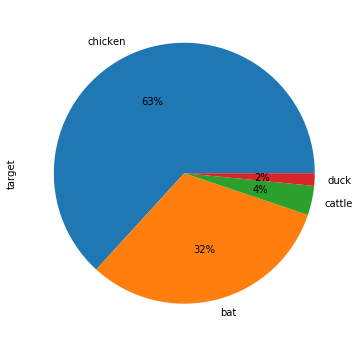

In [8]:
# 각 데이터셋의 % 그래프로 출력
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

df=pd.concat([df1,df2,df3,df4])
#df=df.fillna(0)
df=df.dropna(axis=1)
df['target'].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Data Preprocessing

In [9]:
cov = process_file('genome/homo_sapiens.fasta',"COVID-19")

#모델로 사용할 것이 아니기때문에 target은 drop
cov = cov.drop('target', axis=1)

In [11]:
# 두 데이터셋의 column 개수
print('Number of Column(df) : ',len(df.columns))
print('Number of Column(cov) : ',len(cov.columns))

Number of Column(df) :  348
Number of Column(cov) :  923


In [12]:
# 동물에겐 있고 사람에겐 없는 열찾기
y=df.pop('target')
mc = df.columns.difference(cov.columns)
mc
#해당 열 삭제
df = df.drop(mc, axis=1)

In [13]:
#사람에겐 있고 동물에겐 없는 열찾기
rf = cov.columns.difference(df.columns)
rf
#해당 열 삭제
cov = cov.drop(rf, axis=1)

In [14]:
# 두 데이터셋의 column 개수
print('Number of Column(df) : ',len(df.columns))
print('Number of Column(cov) : ',len(cov.columns))

Number of Column(df) :  342
Number of Column(cov) :  342


## 모델 생성 및 트레이닝

In [15]:
#모델 생성
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost

#y=df.pop('target')
X=df.values

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Prediction

In [25]:
# dataframe -> numpy expression
c=cov.values

In [18]:
model.predict(c)

array(['bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat',
       'bat', 'bat',

In [19]:
import numpy as np
print(model.classes_)
similarities = model.predict_proba(c)
np.round(similarities, 3)

['bat' 'cattle' 'chicken' 'duck']


array([[0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.985, 0.001, 0.012, 0.001],
       [0.985, 0.001, 0.012, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.985, 0.001, 0.012, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.985, 0.001, 0.012, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.987, 0.001, 0.011, 0.001],
       [0.985, 0.001, 0.012, 0.001],
       [0.985, 0.001, 0.012, 0.001],
       [0.987, 0.001, 0.011, 0.001],
 